# Lectura de Archivos en Python

Supongamos que ahora queremos cargar la lista de **k-mers** (```k=3```) sin ambigüedades,  con sus frecuencias, en un nuevo diccionario. Quizás porque alguien nos paso el archivo y queremos trabajar con él dentro de *Python*. Una buena idea es siempre echar un vistazo a los datos, para eso el comando **```head```** de la Terminal de Ubuntu es particularmente útil:

In [1]:
! head -5 codones.txt

ACC	12731
AGG	19393
CCT	18757
AGC	18862
AGA	39295


[Existen muchas maneras de ir leyendo el contenido de un archivo.](https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files) Una de las maneras más útiles es iterar las líneas del archivo usando **```for```** sobre un objeto del tipo ```file```. El archivo de puede ser abierto con **```open()```** en modo lectura (**```r```**) usando la sentencia **```with```**:

In [2]:
with open("codones.txt","r") as archivo:
    for linea in archivo:
        print( linea )
        print( type( linea ) )
        break # Solo imprimo el primero para no llenar la pantalla
        
linea

ACC	12731

<type 'str'>


'ACC\t12731\n'

Cada línea es un **```str```** que termina con un salto de línea (*\n*). Podemos usar los [métodos de **str**](https://docs.python.org/2/library/stdtypes.html#string-methods) para trabajar con cada línea y guardar el contenido en el tipo de objeto deseado. En este caso queremos el objeto en dos listas.

In [3]:
codones = []
frecuencia = []
with open("codones.txt","r") as archivo:
    for linea in archivo:
        campos = linea.replace("\n","").split("\t")
        codones.append( campos[0] )
        frecuencia.append( int( campos[1] ) )

In [4]:
codones[:5]

['ACC', 'AGG', 'CCT', 'AGC', 'AGA']

In [5]:
frecuencia[:5]

[12731, 19393, 18757, 18862, 39295]

# Graficando las Frecuencias

Para graficar usaremos la [biblioteca de Python **matplotlib**](http://matplotlib.org/). Si queremos que los graficos se vean [dentro de IPython](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb), podemos usar el *magic* ```%matplotlib inline```. A su vez, si queremos ver el gráfico, pero silenciar la salida de texto podemos terminar las líneas con **```;```**. También podemos usar **```?```** para recurrir a la ayuda de un método.

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
plt.bar?

<Container object of 64 artists>

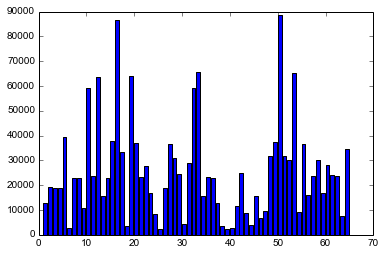

In [10]:
plt.bar(left=range(1,65), height=frecuencia)

Por ejemplo podemos ver si la frecuencia de *k-mers* esta relacionada con el contenido de *GC* en él. Para eso podemos usar la función [**GC()** de Bio.SeqUtils](http://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html#GC). Aca usamos el [**operador ternario**](http://stackoverflow.com/questions/394809/does-python-have-a-ternary-conditional-operator
) para que las columnas sean verdes si hay al menos una G o C, será roja en caso contrario. Podemos ver que los *k-mers* más frecuentes no poseen G o C.

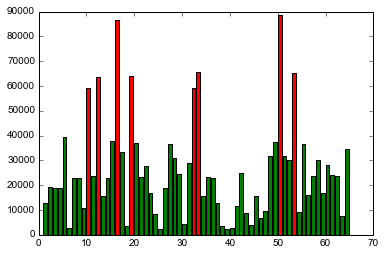

In [11]:
from Bio.SeqUtils import GC
plt.bar(left=range(1,65), height=frecuencia, 
        color=[ "g" if GC(codon) > 33.0 else "r" for codon in codones ] );

In [12]:
from Bio import SeqIO
rec = SeqIO.read("sequence.fasta","fasta")
GC( rec.seq )

31.42633200598209

# Graficando los Codones de Inicio

In [13]:
! head -2 starts.txt

sentido	19
sentido	63


In [14]:
! tail -2 starts.txt

antisentido	841
antisentido	709


In [15]:
import random
# Uso numeros al azar para que no se superpongan tanto los valores

col = []
val = []
pos = []

with open("starts.txt","r") as archivo:
    for linea in archivo:
        
        campos = linea.replace("\n","").split("\t")
        
        pos.append( int( campos[1] ) )
        
        col.append( "b" if campos[0] == "sentido" else "r" )
        
        val.append( random.uniform(1,20) if campos[0] == "sentido" else random.uniform(-20,-1) )

(83247, 249744)

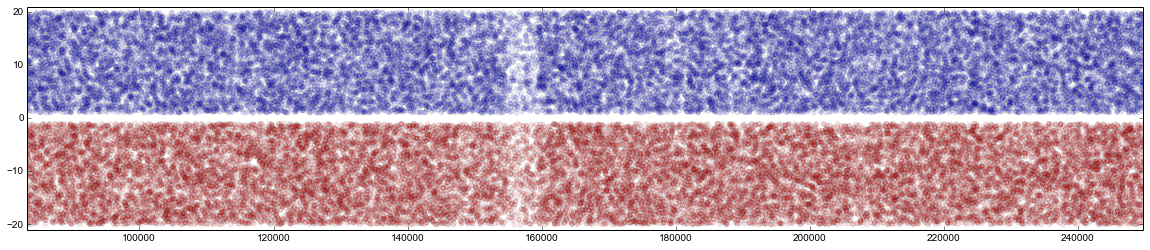

In [16]:
fig, eje = plt.subplots()

# Hago mas ancho el grafico
fig.set_figwidth(20)

eje.scatter(x=pos, y=val, c=col, alpha=0.1)
eje.set_ylim( -21 , 21 )

# Muestro solo el 10% del genoma
l = int( len(rec.seq) * 0.1 )
i = 166494/2
eje.set_xlim( i , i+l )